In [77]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [78]:
# load data into pandas DataFrame
data = pd.read_csv('male_incarceration_rates.tsv', delimiter='\t')

# select columns of interest
columns = ['Geography','Male incarceration rate', 'Male incarceration rate: White alone', 'Male incarceration rate: Black or African American alone', 'Male incarceration rate: American Indian and Alaska Native alone', 'Male incarceration rate: Asian alone']
data = data[columns]




In [79]:
data

,Geography,Male incarceration rate,Male incarceration rate: White alone,Male incarceration rate: Black or African American alone,Male incarceration rate: American Indian and Alaska Native alone,Male incarceration rate: Asian alone
0,United States,"1,350",916,"4,490","2,223",215
1,Alabama,"1,545",918,"3,521",470,197
2,Alaska,947,602,"2,070","2,492",236
3,Arizona,"1,899","1,377","5,505","4,078","1,275"
4,Arkansas,"1,627","1,093","4,801","1,229",637
5,California,"1,265","1,100","5,666","1,665",174
6,Colorado,"1,459","1,264","6,382","5,259",554
7,Connecticut,"1,002",431,"4,274","1,063",113
8,Delaware,"1,384",762,"4,028",238,36
9,District of Columbia,"1,093",138,"1,974","1,846",204


In [80]:
for col in columns:
    if col == 'Geography':
        continue
    data[col] = data[col].str.replace(',', '').astype(float)

In [81]:
data

,Geography,Male incarceration rate,Male incarceration rate: White alone,Male incarceration rate: Black or African American alone,Male incarceration rate: American Indian and Alaska Native alone,Male incarceration rate: Asian alone
0,United States,1350.0,916.0,4490.0,2223.0,215.0
1,Alabama,1545.0,918.0,3521.0,470.0,197.0
2,Alaska,947.0,602.0,2070.0,2492.0,236.0
3,Arizona,1899.0,1377.0,5505.0,4078.0,1275.0
4,Arkansas,1627.0,1093.0,4801.0,1229.0,637.0
5,California,1265.0,1100.0,5666.0,1665.0,174.0
6,Colorado,1459.0,1264.0,6382.0,5259.0,554.0
7,Connecticut,1002.0,431.0,4274.0,1063.0,113.0
8,Delaware,1384.0,762.0,4028.0,238.0,36.0
9,District of Columbia,1093.0,138.0,1974.0,1846.0,204.0


In [82]:
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans

def visualizing_results(df):
    # Create a new DataFrame with only the columns you want to use for clustering
    X = df.iloc[:,1:6]

    # Create a KMeans instance with k = 3
    kmeans = KMeans(n_clusters=3)

    # Fit the model to the data
    kmeans.fit(X)
    df['Cluster'] = kmeans.labels_

    # Get the cluster assignments for each data point
    centroids = kmeans.cluster_centers_
    print(centroids)

    # Create a 3D scatter plot
    fig = px.scatter_3d(df, x='Male incarceration rate', y='Male incarceration rate: White alone', z='Male incarceration rate: Black or African American alone', color='Cluster')

    # Add the centroids as red markers
    fig.add_trace(
        go.Scatter3d(
            x=centroids[:, 0],
            y=centroids[:, 1],
            z=centroids[:, 2],
            mode='markers',
            marker=dict(
                size=10,
                color='red'
            ),
            name='Centroids'
        )
    )

    fig.show()

In [83]:
# visualizing_results(data)

In [98]:
import plotly.express as px
X = data.iloc[:,1:6]

# Create a KMeans instance with k = 3
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Calculate the mean male incarceration rate for each state
data['Mean Male Incarceration Rate'] = data.iloc[:,1:6].mean(axis=1)

# Create a bar chart
fig = px.bar(data, x='Geography', y='Male incarceration rate', color='Cluster', title='Average Male Incarceration Rate by State and Cluster')

fig.show()

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [99]:
# Create a scatter plot
fig = px.scatter(data, x='Male incarceration rate: White alone', y='Male incarceration rate: Black or African American alone', color='Cluster', title='Male Incarceration Rates by Race and Cluster')

fig.show()

In [100]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
data['State Abbreviation'] = data['Geography'].map(state_abbreviations)


In [101]:
# Create a choropleth map
fig = px.choropleth(data, locations='State Abbreviation', locationmode='USA-states', color='Cluster', scope='usa', title='Clusters by State')

fig.show()

In [102]:
import plotly.express as px
import statsmodels.api as sm

# Create a new DataFrame with only the columns you want to use for the regression
X = data[['Male incarceration rate: White alone']]
y = data['Male incarceration rate: Black or African American alone']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Create a scatter plot with the regression line
fig = px.scatter(data, x='Male incarceration rate: White alone', y='Male incarceration rate: Black or African American alone', trendline='ols', title='Male Incarceration Rates by Race')

fig.show()

In [103]:
# Print the model summary
print(model.summary())

                                               OLS Regression Results                                               
Dep. Variable:     Male incarceration rate: Black or African American alone   R-squared:                       0.241
Model:                                                                  OLS   Adj. R-squared:                  0.226
Method:                                                       Least Squares   F-statistic:                     16.19
Date:                                                      Mon, 03 Apr 2023   Prob (F-statistic):           0.000190
Time:                                                              11:25:28   Log-Likelihood:                -462.85
No. Observations:                                                        53   AIC:                             929.7
Df Residuals:                                                            51   BIC:                             933.6
Df Model:                                                       

This output shows the results of a linear regression analysis that models the relationship between the male incarceration rates for Black and White individuals in each state. The dependent variable is the male incarceration rate for Black individuals, and the independent variable is the male incarceration rate for White individuals.

The R-squared value of 0.241 indicates that about 24.1% of the variance in the male incarceration rate for Black individuals can be explained by the male incarceration rate for White individuals. The Adj. R-squared value adjusts the R-squared value for the number of independent variables in the model and is slightly lower at 0.226.

The coef column shows the coefficients of the regression model. The intercept (const) is 2378.8031, and the slope for the Male incarceration rate: White alone variable is 2.5774. This means that for every unit increase in the male incarceration rate for White individuals, we would expect an increase of 2.5774 units in the male incarceration rate for Black individuals, on average.

The P>|t| column shows the p-values for the coefficients. In this case, both coefficients are statistically significant at the 0.05 level, indicating that there is a statistically significant relationship between the male incarceration rates for Black and White individuals.

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

def elbow_method(df, n):
    # Create a new DataFrame with only the columns you want to use for clustering
    X = df.iloc[:,1:6]

    # Perform K-means clustering for different values of K
    inertias = []
    for k in range(1, n):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        inertia = kmeans.inertia_
        inertias.append(inertia)

    # Plot the elbow curve to choose the optimal value of K
    plt.plot(range(1, n), inertias, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal K')
    plt.show()

    # create dataframe for elbow plot data
    elbow_data = pd.DataFrame({
        'K': range(1, n),
        'Inertia': inertias
    })
    elbow_data = elbow_data.set_index('K')

    # print(elbow_data)

    # Calculate the slope and second derivative of the inertia curve
    slopes = [inertias[i+1] - inertias[i] for i in range(len(inertias)-1)]
    second_derivatives = [slopes[i+1] - slopes[i] for i in range(len(slopes)-1)]

    # Find the index of the maximum second derivative
    max_index = second_derivatives.index(max(second_derivatives))

    # The optimal value of K is one more than the index of the maximum second derivative
    best_k = max_index + 2
    print(best_k)

    return df, elbow_data, inertias, best_k

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

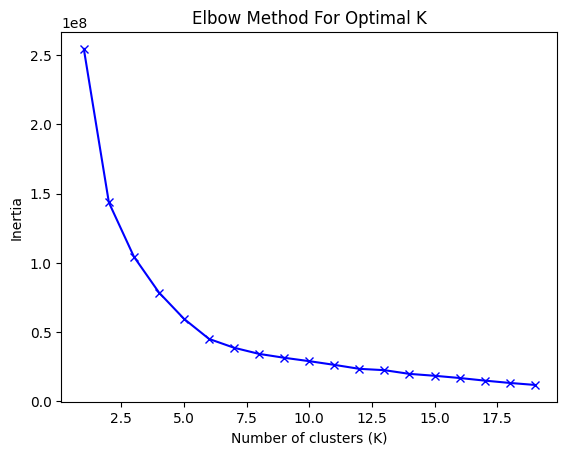

2


(               Geography  Male incarceration rate  \
 0          United States                   1350.0   
 1                Alabama                   1545.0   
 2                 Alaska                    947.0   
 3                Arizona                   1899.0   
 4               Arkansas                   1627.0   
 5             California                   1265.0   
 6               Colorado                   1459.0   
 7            Connecticut                   1002.0   
 8               Delaware                   1384.0   
 9   District of Columbia                   1093.0   
 10               Florida                   1634.0   
 11               Georgia                   1988.0   
 12                Hawaii                    672.0   
 13                 Idaho                   1245.0   
 14              Illinois                   1025.0   
 15               Indiana                   1378.0   
 16                  Iowa                    781.0   
 17                Kansas   

In [89]:
elbow_method(data, 20)

In [90]:
X = data.iloc[:, 1:]
X

,Male incarceration rate,Male incarceration rate: White alone,Male incarceration rate: Black or African American alone,Male incarceration rate: American Indian and Alaska Native alone,Male incarceration rate: Asian alone,Cluster,Mean Male Incarceration Rate,State Abbreviation
0,1350.0,916.0,4490.0,2223.0,215.0,1,1838.8,NaN
1,1545.0,918.0,3521.0,470.0,197.0,4,1330.2,AL
2,947.0,602.0,2070.0,2492.0,236.0,0,1269.4,AK
3,1899.0,1377.0,5505.0,4078.0,1275.0,3,2826.8,AZ
4,1627.0,1093.0,4801.0,1229.0,637.0,4,1877.4,AR
5,1265.0,1100.0,5666.0,1665.0,174.0,1,1974.0,CA
6,1459.0,1264.0,6382.0,5259.0,554.0,3,2983.6,CO
7,1002.0,431.0,4274.0,1063.0,113.0,4,1376.6,CT
8,1384.0,762.0,4028.0,238.0,36.0,4,1289.6,DE
9,1093.0,138.0,1974.0,1846.0,204.0,0,1051.0,NaN


In [91]:
# standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(X)

ValueError: could not convert string to float: 'AL'

In [ ]:
# # replace any missing values with the mean of the column
# data = data.fillna(data.mean())

# # standardize the data
# scaler = StandardScaler()
# data_std = scaler.fit_transform(X[columns])

# perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_std)

# add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# calculate the mean incarceration rate for each cluster
means = data.groupby('Cluster')[columns].mean()




/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/ipykernel_18024/1034170305.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
print(data.head())

       Geography  Male incarceration rate  \
0  United States                   1350.0   
1        Alabama                   1545.0   
2         Alaska                    947.0   
3        Arizona                   1899.0   
4       Arkansas                   1627.0   

   Male incarceration rate: White alone  \
0                                 916.0   
1                                 918.0   
2                                 602.0   
3                                1377.0   
4                                1093.0   

   Male incarceration rate: Black or African American alone  \
0                                             4490.0          
1                                             3521.0          
2                                             2070.0          
3                                             5505.0          
4                                             4801.0          

   Male incarceration rate: American Indian and Alaska Native alone  \
0                   

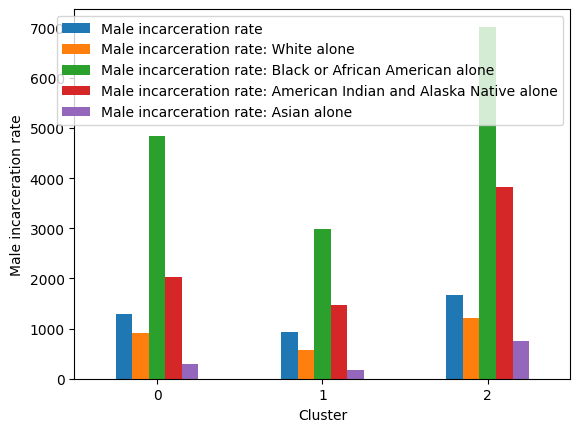

In [ ]:
# plot the results
means.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Male incarceration rate')
plt.xticks(rotation=0)
plt.show()

In [ ]:

# select columns of interest
columns = ['Male incarceration rate', 'Male incarceration rate: White alone', 'Male incarceration rate: Black or African American alone', 'Male incarceration rate: American Indian and Alaska Native alone', 'Male incarceration rate: Asian alone']
data = data[columns]

# convert string values to floats
data = data.applymap(lambda x: float(x.replace(',', '')))

# standardize the data
data = (data - data.mean()) / data.std()

# perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

# add cluster labels to the data
data['cluster'] = kmeans.labels_



AttributeError: 'float' object has no attribute 'replace'

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


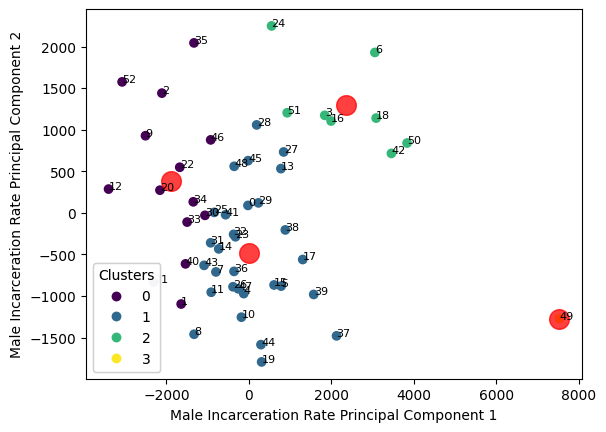

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
# load data into pandas DataFrame
data = pd.read_csv('male_incarceration_rates.tsv', delimiter='\t')

# select columns of interest
columns = ['Geography', 'Male incarceration rate', 'Male incarceration rate: White alone', 'Male incarceration rate: Black or African American alone', 'Male incarceration rate: American Indian and Alaska Native alone', 'Male incarceration rate: Asian alone']
data = data[columns]
# replace commas with empty string and convert to integer
data['Male incarceration rate'] = data['Male incarceration rate'].str.replace(',', '').astype(int)
data['Male incarceration rate: White alone'] = data['Male incarceration rate: White alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Black or African American alone'] = data['Male incarceration rate: Black or African American alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: American Indian and Alaska Native alone'] = data['Male incarceration rate: American Indian and Alaska Native alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Asian alone'] = data['Male incarceration rate: Asian alone'].str.replace(',', '').astype(int)



# drop the "Geography" column before fitting KMeans
X = data.drop('Geography', axis=1)
# convert string values to floats
# # standardize the data
# data = (data - data.mean()) / data.std()

# apply KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
# create scatter plot with colored clusters and labels
fig, ax = plt.subplots()
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis')
for i, txt in enumerate(X.index):
    ax.text(principal_components[i, 0], principal_components[i, 1], txt, fontsize=8)

# add cluster centers as red circles
cluster_centers = pca.transform(kmeans.cluster_centers_)
for i in range(kmeans.n_clusters):
    ax.scatter(cluster_centers[i, 0], cluster_centers[i, 1], s=200, c='red', marker='o', alpha=0.75)

# add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

# add axis labels
ax.set_xlabel('Male Incarceration Rate Principal Component 1')
ax.set_ylabel('Male Incarceration Rate Principal Component 2')

plt.show()



/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


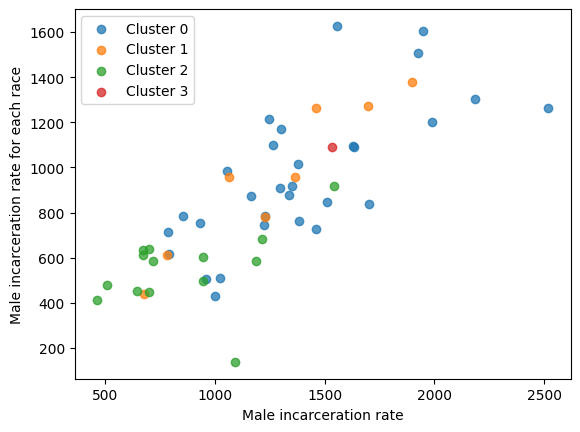

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
# load data into pandas DataFrame
data = pd.read_csv('male_incarceration_rates.tsv', delimiter='\t')

# select columns of interest
columns = ['Geography', 'Male incarceration rate', 'Male incarceration rate: White alone', 'Male incarceration rate: Black or African American alone', 'Male incarceration rate: American Indian and Alaska Native alone', 'Male incarceration rate: Asian alone']
data = data[columns]
# replace commas with empty string and convert to integer
data['Male incarceration rate'] = data['Male incarceration rate'].str.replace(',', '').astype(int)
data['Male incarceration rate: White alone'] = data['Male incarceration rate: White alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Black or African American alone'] = data['Male incarceration rate: Black or African American alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: American Indian and Alaska Native alone'] = data['Male incarceration rate: American Indian and Alaska Native alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Asian alone'] = data['Male incarceration rate: Asian alone'].str.replace(',', '').astype(int)



# drop the "Geography" column before fitting KMeans
# convert string values to floats
# # standardize the data
# data = (data - data.mean()) / data.std()


X = data.drop('Geography', axis=1)

# apply KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# create scatter plot with colored clusters and labels
fig, ax = plt.subplots()
for i in range(kmeans.n_clusters):
    ax.scatter(X.iloc[kmeans.labels_==i, 0], X.iloc[kmeans.labels_==i, 1], label=f'Cluster {i}', alpha=0.75)

# add legend
ax.legend()

# add axis labels
ax.set_xlabel('Male incarceration rate')
ax.set_ylabel('Male incarceration rate for each race')

# show plot
plt.show()



In [ ]:
data = data.sort_values(by='cluster', ascending=True)

(data)

,Geography,Male incarceration rate,Male incarceration rate: White alone,Male incarceration rate: Black or African American alone,Male incarceration rate: American Indian and Alaska Native alone,Male incarceration rate: Asian alone,cluster
26,Missouri,1296,908,4625,1161,72,0
41,South Carolina,1702,836,3990,1941,302,0
48,Washington,855,784,4073,2420,200,0
43,Tennessee,1338,877,3857,1097,215,0
36,Ohio,1229,784,4584,1311,247,0
44,Texas,1926,1506,5371,940,321,0
45,Utah,788,715,4368,2604,292,0
47,Virginia,1509,845,4721,1223,126,0
0,United States,1350,916,4490,2223,215,0
32,New Mexico,1556,1627,4201,1821,424,0


The clusters represent groups of regions that have similar male incarceration rates. Each region is assigned to a cluster based on the similarity of its male incarceration rates to the average male incarceration rates of the cluster. This means that regions in the same cluster have similar male incarceration rates, while regions in different clusters have different male incarceration rates.

In [ ]:
# create a new DataFrame with the cluster assignments
clustered_data = data.assign(cluster=kmeans.labels_)

# calculate the mean values of the features for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# display the result
print(cluster_means)

         Male incarceration rate  Male incarceration rate: White alone  \
cluster                                                                  
0                    1441.041667                            954.333333   
1                    1534.000000                           1091.000000   
2                    1251.933333                            962.466667   
3                     805.307692                            521.076923   

         Male incarceration rate: Black or African American alone  \
cluster                                                             
0                                              4467.416667          
1                                             11957.000000          
2                                              5876.000000          
3                                              2713.538462          

         Male incarceration rate: American Indian and Alaska Native alone  \
cluster                                                        

/var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/ipykernel_63077/976828816.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = clustered_data.groupby('cluster').mean()


-    Cluster 0 has a relatively low overall male incarceration rate (1441), and the lowest rates for Black and Asian men compared to the other clusters. The rate for American Indian and Alaska Native men is the second highest among all clusters, after cluster 1.
-    Cluster 1 has the highest overall male incarceration rate (1534), and the highest rates for Black and American Indian and Alaska Native men compared to the other clusters. The rate for White men is also the highest among all clusters.
-    Cluster 2 has a moderately high overall male incarceration rate (1251), and the second highest rate for Black men compared to cluster 1. The rate for American Indian and Alaska Native men is also high in this cluster.
-    Cluster 3 has the lowest overall male incarceration rate (805), and the lowest rates for White, Black, and American Indian and Alaska Native men compared to the other clusters. The rate for Asian men is also the lowest among all clusters.

These interpretations should be taken with caution and further analysis is needed to understand the factors that contribute to these differences in male incarceration rates across races and clusters.

-     Cluster 0 has a relatively low overall male incarceration rate (1388), and also the lowest rates for white and Asian men compared to the other clusters. However, the rate for Black men is the highest among all clusters (4769).
-     Cluster 1 also has a relatively low overall male incarceration rate (1272), but higher rates for white and Asian men compared to cluster 0. The rate for Black men is even higher than in cluster 0 (6094).
-     Cluster 2 has the lowest overall male incarceration rate (858), and also the lowest rates for white and Black men. The rate for Asian men is the lowest among all clusters (197).
-     Cluster 3 has the highest overall male incarceration rate (1534), and the highest rates for all races. The rate for Black men is the highest among all clusters by a large margin (11957).

In [ ]:
data['cluster'] = kmeans.fit_predict(X)
print(data['cluster'])
print(data.head())


/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     0
1     0
2     3
3     2
4     0
5     0
6     2
7     0
8     0
9     3
10    0
11    0
12    3
13    2
14    0
15    0
16    2
17    2
18    2
19    0
20    3
21    3
22    3
23    0
24    2
25    0
26    0
27    2
28    2
29    0
30    3
31    0
32    0
33    3
34    3
35    3
36    0
37    2
38    2
39    2
40    3
41    0
42    2
43    0
44    0
45    0
46    3
47    0
48    0
49    1
50    2
51    2
52    3
Name: cluster, dtype: int32
       Geography  Male incarceration rate  \
0  United States                     1350   
1        Alabama                     1545   
2         Alaska                      947   
3        Arizona                     1899   
4       Arkansas                     1627   

   Male incarceration rate: White alone  \
0                                   916   
1                                   918   
2                                   602   
3                                  1377   
4                                  1093   

   Male incarcerat

In this code, after performing PCA to reduce the dimensionality of the data, the two principal components that capture the most variance in the data are selected and plotted on the scatter plot. The horizontal axis is labeled as "PC1", and the vertical axis is labeled as "PC2".

PCA transforms the original variables into a new set of variables (the principal components) that are linear combinations of the original variables. The first principal component (PC1) is the linear combination that captures the most variance in the data, and the second principal component (PC2) captures the second most variance, and so on. By plotting the data on the two principal components with the most variance, we can visualize the data in two dimensions and capture the majority of the information in the original data.

Therefore, the "PC1" and "PC2" axes represent the two principal components that capture the most variance in the data after performing PCA. They are not the original variables in the dataset, but rather, they are new variables that are created based on the original variables.

The lines ax.set_xlabel('PC1') and ax.set_ylabel('PC2') add x-axis and y-axis labels to the scatter plot. In this case, PC1 and PC2 refer to the first and second principal components, respectively, that were generated through PCA. PC1 and PC2 are new variables that were created by combining the original variables (in this case, the different male incarceration rates for different races) in a way that captures the maximum amount of variation in the data. Adding the labels helps the reader understand what the x- and y-axes represent and how to interpret the plot

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but PCA is expecting 6 features as input.

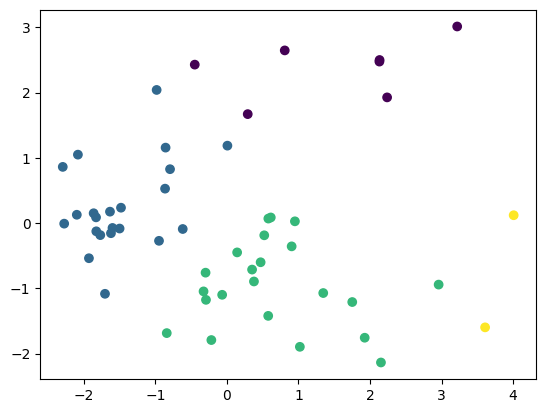

In [ ]:
# create a scatter plot of the first two principal components with cluster colors
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['cluster'], cmap='viridis')

# add cluster centers as red circles
cluster_centers = pca.transform(kmeans.cluster_centers_)
for i in range(kmeans.n_clusters):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], s=200, c='red', marker='o', alpha=0.75)

# add cluster ellipses
for i in range(kmeans.n_clusters):
    cov_matrix = np.cov(principal_components[data['cluster'] == i].T)
    lambda_, v = np.linalg.eig(cov_matrix)
    lambda_ = np.sqrt(lambda_)
    ellipse = Ellipse(xy=cluster_centers[i], width=lambda_[0]*2, height=lambda_[1]*2, angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='red', fc='None', lw=2)
    plt.gca().add_patch(ellipse)

# add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Male Incarceration Rates by Race/Ethnicity')

# show the plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# load data into pandas DataFrame
data = pd.read_csv('male_incarceration_rates.tsv', delimiter='\t')

# select columns of interest
columns = ['Geography', 'Male incarceration rate', 'Male incarceration rate: White alone', 'Male incarceration rate: Black or African American alone', 'Male incarceration rate: American Indian and Alaska Native alone', 'Male incarceration rate: Asian alone']
data = data[columns]
# replace commas with empty string and convert to integer
data['Male incarceration rate'] = data['Male incarceration rate'].str.replace(',', '').astype(int)
data['Male incarceration rate: White alone'] = data['Male incarceration rate: White alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Black or African American alone'] = data['Male incarceration rate: Black or African American alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: American Indian and Alaska Native alone'] = data['Male incarceration rate: American Indian and Alaska Native alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Asian alone'] = data['Male incarceration rate: Asian alone'].str.replace(',', '').astype(int)


# one-hot encode the geography column
data = pd.get_dummies(data, columns=['Geography'])

# create a new DataFrame with only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# fit the k-means clustering algorithm to the numeric data
kmeans = KMeans(n_clusters=3)
kmeans.fit(numeric_data)

# add the cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data

,Male incarceration rate,Male incarceration rate: White alone,Male incarceration rate: Black or African American alone,Male incarceration rate: American Indian and Alaska Native alone,Male incarceration rate: Asian alone,Geography_Alabama,Geography_Alaska,Geography_Arizona,Geography_Arkansas,Geography_California,...,Geography_Texas,Geography_United States,Geography_Utah,Geography_Vermont,Geography_Virginia,Geography_Washington,Geography_West Virginia,Geography_Wisconsin,Geography_Wyoming,cluster
0,1350,916,4490,2223,215,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
1,1545,918,3521,470,197,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,947,602,2070,2492,236,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1899,1377,5505,4078,1275,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1627,1093,4801,1229,637,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
5,1265,1100,5666,1665,174,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
6,1459,1264,6382,5259,554,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1002,431,4274,1063,113,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1384,762,4028,238,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1093,138,1974,1846,204,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


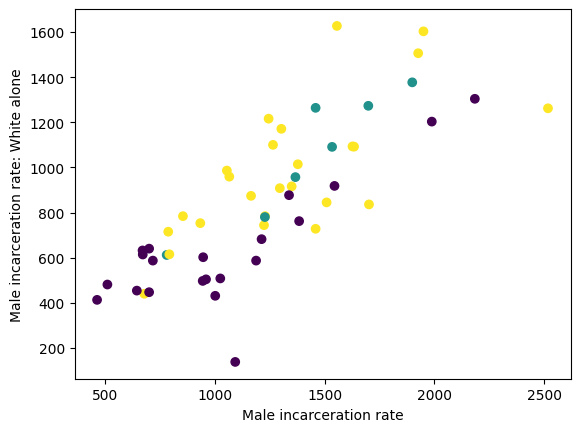

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of the data
plt.scatter(data['Male incarceration rate'], data['Male incarceration rate: White alone'], c=data['cluster'])

# add axis labels
plt.xlabel('Male incarceration rate')
plt.ylabel('Male incarceration rate: White alone')

# show the plot
plt.show()

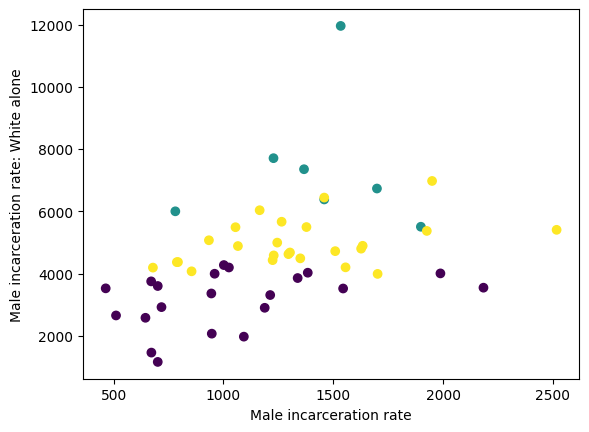

In [ ]:
# create a scatter plot of the data
plt.scatter(data['Male incarceration rate'], data['Male incarceration rate: Black or African American alone'], c=data['cluster'])

# add axis labels
plt.xlabel('Male incarceration rate')
plt.ylabel('Male incarceration rate: White alone')

# show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# load data into pandas DataFrame
data = pd.read_csv('male_incarceration_rates.tsv', delimiter='\t')

# select columns of interest
columns = ['Geography', 'Male incarceration rate', 'Male incarceration rate: White alone', 'Male incarceration rate: Black or African American alone', 'Male incarceration rate: American Indian and Alaska Native alone', 'Male incarceration rate: Asian alone']
data = data[columns]
data  = data.drop('Geography', axis=1)

# replace commas with empty string and convert to integer
data['Male incarceration rate'] = data['Male incarceration rate'].str.replace(',', '').astype(int)
data['Male incarceration rate: White alone'] = data['Male incarceration rate: White alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Black or African American alone'] = data['Male incarceration rate: Black or African American alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: American Indian and Alaska Native alone'] = data['Male incarceration rate: American Indian and Alaska Native alone'].str.replace(',', '').astype(int)
data['Male incarceration rate: Asian alone'] = data['Male incarceration rate: Asian alone'].str.replace(',', '').astype(int)

# define target variable (y) and predictor variables (X)
y = data['Male incarceration rate: Asian alone']
X = data.drop('Male incarceration rate', axis=1)

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a Random Forest Regressor model
model = RandomForestRegressor()

# fit the model to the training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([ 66.11, 549.15, 430.44, 207.26, 123.24, 204.47, 317.49, 197.14,
       194.2 , 453.18, 314.88])

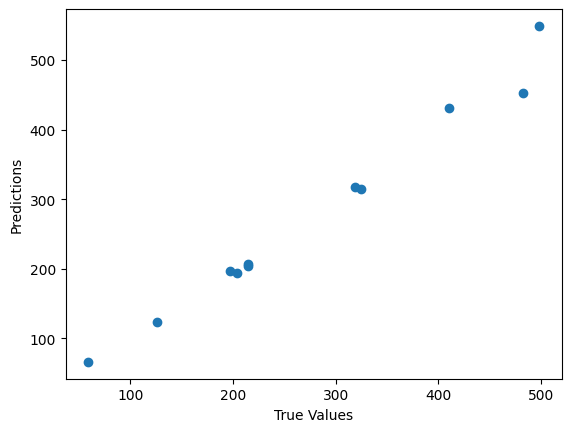

In [ ]:
import matplotlib.pyplot as plt

# plot true values vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()